In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the dataset

In [2]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Checking target classes

Text(0,0.5,'Count')

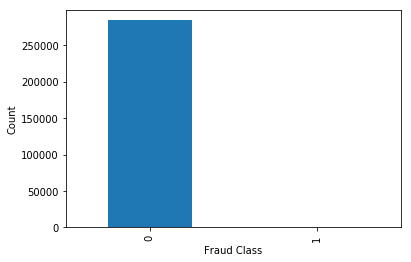

In [3]:
data['Class'].value_counts(sort=True).plot(kind='bar')
plt.xlabel('Fraud Class')
plt.ylabel('Count')

In [4]:
from sklearn.preprocessing import StandardScaler
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data=data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### Resampling

In [5]:
X=data.iloc[:,data.columns!='Class']
y=data.iloc[:,data.columns=='Class']

In [6]:
# Number of data points in the minority class (class=1)
number_records_fraud=len(data[data.Class==1])
fraud_indices=np.array(data[data.Class==1].index)

In [7]:
# picking the indices of the normal class (class=0)
normal_indices=data[data.Class==0].index

In [8]:
random_normal_indices=np.random.choice(normal_indices,number_records_fraud,replace=False)
random_normal_indices=np.array(random_normal_indices)

In [9]:
under_sample_indices=np.concatenate([fraud_indices,random_normal_indices])

In [10]:
under_sample_data=data.iloc[under_sample_indices,:]

X_undersample=under_sample_data.iloc[:,under_sample_data.columns!='Class']
y_undersample=under_sample_data.iloc[:,under_sample_data.columns=='Class']

In [11]:
y_undersample

,Class
541,1
623,1
4920,1
6108,1
6329,1
6331,1
6334,1
6336,1
6338,1
6427,1


In [12]:
under_sample_data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

### Split the data

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [14]:
lr=LogisticRegression(C=1e9)

In [15]:
scores=cross_val_score(lr,X_undersample,y_undersample.values.ravel(),
                      cv=10,scoring='accuracy')
scores

array([0.98      , 0.96      , 0.98979592, 0.87755102, 0.8877551 ,
       0.93877551, 0.95918367, 0.91836735, 0.95918367, 0.8877551 ])

In [16]:
scores.mean()

0.9358367346938776